# Model 
* In this section, we will train 3 models and chose the best from those.
    * Linear Regression
    * Random Forest
    * Neural Network

## Data Preprocessing

In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [2]:
data = pd.read_pickle('dataset/flight_prices')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332914 entries, 0 to 5332913
Data columns (total 5 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   SCHEDULED_DEPARTURE  datetime64[ns]
 2   ORIGIN_AIRPORT       object        
 3   DESTINATION_AIRPORT  object        
 4   PRICE                float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 203.4+ MB


In [3]:
# # This was used to check for incosistent datatypes in columns
# non_string_values = data['AIRLINE'].apply(lambda x: not isinstance(x, str))
# print("Values that are not of type string:")
# print(data.loc[non_string_values, 'AIRLINE'])

### Encoding Categorical features

In [4]:
# # One hot encode categorical variables
# categorical_features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
# one_hot_encoder = OneHotEncoder(sparse=False)
# encoded_features = one_hot_encoder.fit_transform(data[categorical_features])

# # Convert the result to a DataFrame and concatenate with the original DataFrame
# encoded_features_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))
# data = pd.concat([data, encoded_features_df], axis=1)
# data.drop(categorical_features, axis=1, inplace=True)

In [5]:
# Label Encoding
categorical_features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

joblib.dump(label_encoders, 'tmodels/label_encoders.pkl')

['tmodels/label_encoders.pkl']

In [6]:
# Extract hour and minute from datetime features
data['SCHEDULED_DEPARTURE_HOUR'] = pd.to_datetime(data['SCHEDULED_DEPARTURE']).dt.hour
data['SCHEDULED_DEPARTURE_MINUTE'] = pd.to_datetime(data['SCHEDULED_DEPARTURE']).dt.minute
data['SCHEDULED_DEPARTURE_DAY_OF_WEEK'] = pd.to_datetime(data['SCHEDULED_DEPARTURE']).dt.dayofweek
data['SCHEDULED_DEPARTURE_MONTH'] = pd.to_datetime(data['SCHEDULED_DEPARTURE']).dt.month

# Drop the original datetime columns
data = data.drop(['SCHEDULED_DEPARTURE'], axis=1)

In [7]:
# Feature selection
features = data.drop('PRICE', axis=1)
target = data['PRICE']

### Train Test Split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training

In [9]:
### Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 1.3150246833811283


In [10]:
joblib.dump(rf_model,'tmodels/random_forest.pkl')

['tmodels/random_forest.pkl']

In [11]:
### Linear Regression
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)
# linear_pred = linear_model.predict(X_test)
# linear_mse = mean_squared_error(y_test, linear_pred)
# print(f'Linear Regression MSE: {linear_mse}')

In [12]:
### Neural Network

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(1028, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(tf.keras.layers.Dense(512, activation='relu'))
nn_model.add(tf.keras.layers.Dense(256, activation='relu'))
nn_model.add(tf.keras.layers.Dense(1, activation='relu'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_model.compile(optimizer=opt, loss='mse', metrics=['mae'])
history = nn_model.fit(X_train, y_train, epochs=25, batch_size=64)

joblib.dump(nn_model,'tmodels/nn_model.pkl')

d:\.anaconda\envs\machineLearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - loss: 8386.1484 - mae: 67.8917
Epoch 2/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 202s 3ms/step - loss: 5913.5459 - mae: 56.8260
Epoch 3/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 4901.5000 - mae: 51.4595
Epoch 4/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - loss: 4216.8657 - mae: 47.3369
Epoch 5/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - loss: 3786.7983 - mae: 44.5753
Epoch 6/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - loss: 3478.0332 - mae: 42.4800
Epoch 7/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 13601s 204ms/step - loss: 3260.8171 - mae: 40.9485
Epoch 8/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 200s 3ms/step - loss: 3106.9907 - mae: 39.8666
Epoch 9/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 208s 3ms/step - loss: 2961.1340 - mae: 38.7773
Epoch 10/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 200s 3ms/step - loss: 2833.6335 - mae: 37.8292
Epoch 11/25
66662/66662 ━━━━━━━━━━━━━━━━━━━━ 199s 3ms/step - loss: 2746.1238 - mae: 3

['tmodels/nn_model.pkl']

### Evaluation

In [13]:
nn_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
print(f'Neural Network MSE: {nn_mse}')

33331/33331 ━━━━━━━━━━━━━━━━━━━━ 32s 955us/step
Neural Network MSE: 2053.715685985156


In [14]:
score = nn_model.evaluate(X_test, y_test, verbose=2)

33331/33331 - 33s - 987us/step - loss: 2053.7109 - mae: 31.9283


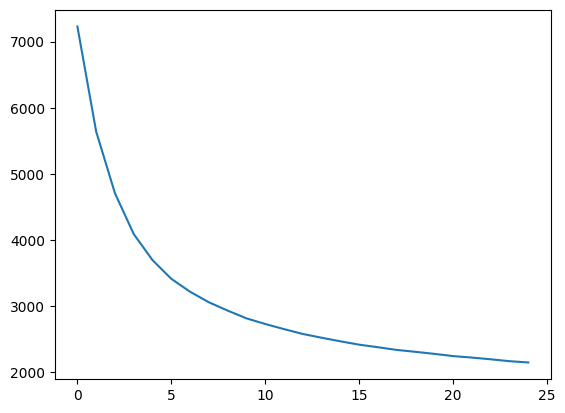

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])